<a href="https://colab.research.google.com/github/rakhaegg/search-algorithm/blob/main/SearchAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Representation Graph**

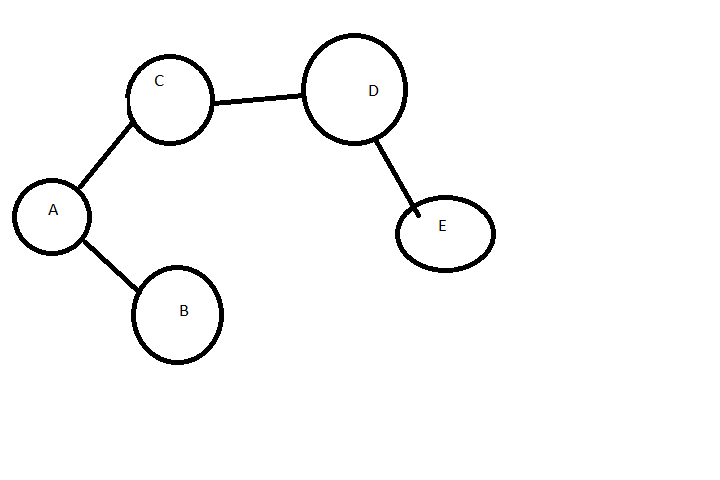

**Undirect Graph**

In [2]:
graph_element = {
    "a" : ["b" , "c"],
    "b" : ["a" , "d"],
    "c" : ["a" , "d"],
    "d" : ["e"],
    "e" : ["d"]
}
print(graph_element)

{'a': ['b', 'c'], 'b': ['a', 'd'], 'c': ['a', 'd'], 'd': ['e'], 'e': ['d']}


In [3]:
class graph:
  def __init__(self , gdict=None):
    if gdict is None:
      gdict = []
    self.gdict = gdict
  def getVertices(self):
    return list(self.gdict.keys())
  def edges(self):
    return self.findEdges()
  def addVertex(self , v):
    if v not in self.gdict:
      self.gdict[v] = []
  def addEdges(self , edge):
    # temv1 , temv2 = edge
    # print("V1 : " , temv1 )
    # print("V2 : " , temv2)
    edge = set(edge)
    (u, v) = tuple(edge)
    if v and u in self.gdict:
      self.gdict[u].append(v)
      self.gdict[v].append(u)
      print(self.gdict)
    elif v or u not in self.gdict :
      if v not in self.gdict:
        self.gdict[v] = []
      if u not in self.gdict :
        self.gdict[u] = []
      self.gdict[u].append(v)
      self.gdict[v].append(u)
  def findEdges(self):
    edgeName = []
    for v in self.gdict:
      for u in self.gdict[v]:
        if {v , u} not in edgeName:
          edgeName.append({v , u})
        
    # Second Approach
    edgeNameSecond = []
    print(self.gdict)
    for v in self.gdict:
      for u in self.gdict[v]:
        print("V : " , v)
        edgeNameSecond.append({u , v})

    return edgeNameSecond 

In [4]:
g = graph(graph_element)
print(g.getVertices())

['a', 'b', 'c', 'd', 'e']


In [5]:
print(g.edges())

{'a': ['b', 'c'], 'b': ['a', 'd'], 'c': ['a', 'd'], 'd': ['e'], 'e': ['d']}
V :  a
V :  a
V :  b
V :  b
V :  c
V :  c
V :  d
V :  e
[{'b', 'a'}, {'a', 'c'}, {'a', 'b'}, {'b', 'd'}, {'a', 'c'}, {'c', 'd'}, {'d', 'e'}, {'e', 'd'}]


In [6]:
g.addVertex("f")
print(g.getVertices())

['a', 'b', 'c', 'd', 'e', 'f']


In [7]:
# g.addEdges({'a' , 'e'}) # Vertex sudah ada 
# g.addEdges({'z' , 'w' })
print(g.edges())

{'a': ['b', 'c'], 'b': ['a', 'd'], 'c': ['a', 'd'], 'd': ['e'], 'e': ['d'], 'f': []}
V :  a
V :  a
V :  b
V :  b
V :  c
V :  c
V :  d
V :  e
[{'b', 'a'}, {'a', 'c'}, {'a', 'b'}, {'b', 'd'}, {'a', 'c'}, {'c', 'd'}, {'d', 'e'}, {'e', 'd'}]


In [8]:
g.addEdges({'f' , 'e'})
print(g.edges())

{'a': ['b', 'c'], 'b': ['a', 'd'], 'c': ['a', 'd'], 'd': ['e'], 'e': ['d', 'f'], 'f': ['e']}
{'a': ['b', 'c'], 'b': ['a', 'd'], 'c': ['a', 'd'], 'd': ['e'], 'e': ['d', 'f'], 'f': ['e']}
V :  a
V :  a
V :  b
V :  b
V :  c
V :  c
V :  d
V :  e
V :  e
V :  f
[{'b', 'a'}, {'a', 'c'}, {'a', 'b'}, {'b', 'd'}, {'a', 'c'}, {'c', 'd'}, {'d', 'e'}, {'e', 'd'}, {'f', 'e'}, {'f', 'e'}]


**List**

In [9]:
class AdjList:
  def __init__(self , data  = None , next=None):
    self.data = data
    self.next = None

class LinkedListGraph:
  def __init__(self):
    self.head =  None
  def insertData(self , data):
    newNode = AdjList(data)
    if(self.head):
      current = self.head
      while(current.next):
        current = current.next
      current.next = newNode
    else :
      self.head = newNode
  def getData(self):
    current = self.head
    while(current):
      print(current.data)
      current = current.next
    
listGraph = LinkedListGraph()
vertex = {}
for v in graph_element.keys():
  listGraph = LinkedListGraph()
  for u in graph_element[v]:
    listGraph.insertData(u)
  vertex[v] = listGraph

In [10]:
print(vertex['a'].getData())
print(vertex['b'].getData())

b
c
None
a
d
None


**Matrix Representation**

**Column adalah vertex**
<br>
**Baris adalah adj**

In [11]:
print(graph_element)

{'a': ['b', 'c'], 'b': ['a', 'd'], 'c': ['a', 'd'], 'd': ['e'], 'e': ['d', 'f'], 'f': ['e']}


In [12]:
matrix = [[x for x in graph_element.keys() ] for y in range(len(graph_element.keys()))]
qwe =0
for v in graph_element.keys():
    tempIndex = []
    for u in graph_element[v]:
      print("U: " , u)
      # print("V:" , type(matrix[qwe][rr]) )
      for rr in range(6):
        print(matrix[qwe][rr])
        if matrix[qwe][rr] == u:
          matrix[qwe][rr] = 1
          if rr in tempIndex:
            tempIndex.remove(rr)
        else:
          if rr not in tempIndex:
            tempIndex.append(rr)
    print(tempIndex)
    print(matrix)
    print()
    qwe = qwe + 1


U:  b
a
b
c
d
e
f
U:  c
a
1
c
d
e
f
[0, 3, 4, 5, 1]
[['a', 1, 1, 'd', 'e', 'f'], ['a', 'b', 'c', 'd', 'e', 'f'], ['a', 'b', 'c', 'd', 'e', 'f'], ['a', 'b', 'c', 'd', 'e', 'f'], ['a', 'b', 'c', 'd', 'e', 'f'], ['a', 'b', 'c', 'd', 'e', 'f']]

U:  a
a
b
c
d
e
f
U:  d
1
b
c
d
e
f
[1, 2, 4, 5, 0]
[['a', 1, 1, 'd', 'e', 'f'], [1, 'b', 'c', 1, 'e', 'f'], ['a', 'b', 'c', 'd', 'e', 'f'], ['a', 'b', 'c', 'd', 'e', 'f'], ['a', 'b', 'c', 'd', 'e', 'f'], ['a', 'b', 'c', 'd', 'e', 'f']]

U:  a
a
b
c
d
e
f
U:  d
1
b
c
d
e
f
[1, 2, 4, 5, 0]
[['a', 1, 1, 'd', 'e', 'f'], [1, 'b', 'c', 1, 'e', 'f'], [1, 'b', 'c', 1, 'e', 'f'], ['a', 'b', 'c', 'd', 'e', 'f'], ['a', 'b', 'c', 'd', 'e', 'f'], ['a', 'b', 'c', 'd', 'e', 'f']]

U:  e
a
b
c
d
e
f
[0, 1, 2, 3, 5]
[['a', 1, 1, 'd', 'e', 'f'], [1, 'b', 'c', 1, 'e', 'f'], [1, 'b', 'c', 1, 'e', 'f'], ['a', 'b', 'c', 'd', 1, 'f'], ['a', 'b', 'c', 'd', 'e', 'f'], ['a', 'b', 'c', 'd', 'e', 'f']]

U:  d
a
b
c
d
e
f
U:  f
a
b
c
1
e
f
[0, 1, 2, 4, 3]
[['a', 1, 1, 'd', 'e

In [13]:
for x in range(5):
  print(x)

0
1
2
3
4


In [14]:
#matrix = [[ x for x in graph_element.keys() ]] * 5
array_2d = [[0 for x in range(2)] for y in range(3)]

#matrix[0][1] = 1
array_2d[0][0] = 100
print(array_2d)


[[100, 0], [0, 0], [0, 0]]


In [15]:
print(array_2d)

[[100, 0], [0, 0], [0, 0]]


# **Breadth-first Search**

In [16]:
from queue import Queue


**S ->  W , R**
<br>
**W -> T , X**
<br>
**R -> V**
<br>
**T -> U**
<br>
**X -> U,Y**
<br>
**U -> Y**


In [17]:
graph_element = {
    "S" : ["W" , "R"],
    "W" : ["T" , "X"],
    "R" : ["V"],
    "T" : ["U"],
    "X" : ["U" , "Y"],
    "U" : ["Y"]
}
print(graph_element)

{'S': ['W', 'R'], 'W': ['T', 'X'], 'R': ['V'], 'T': ['U'], 'X': ['U', 'Y'], 'U': ['Y']}


In [108]:
class AdjList:
  def __init__(self , data  = None , next=None , color =None , phi=None , distance=None):
    self.data = data
    self.next = None
    self.color = color
    self.phi = phi
    self.distance = distance

class LinkedListGraph:
  def __init__(self):
    self.head =  None
  
  def insertData(self , data):
    newNode = AdjList(data)
    if(self.head):
      current = self.head
      while(current.next):
        current = current.next
      current.next = newNode
    else :
      self.head = newNode
  def getData(self):
    current = self.head
    temp = []
    while(current):
      temp.append(current.data)
      current = current.next
    return temp
  def setColor(self , color ,data):
    current = self.head
    while(current):
      if current.data == data:
        current.color = color
        break
      current = current.next
  def setDistance(self , distance , data):
    current = self.head
    while(current):
      if current.data == data:
        current.distance = distance
        break
      current = current.next
  def setPhi(self , phi , data):
    current = self.head
    while(current):
      if current.data == data:
        current.phi =phi
        break
      current = current.next
  def getColor(self):
    current = self.head
    while(current):
      print(current.color)
      current = current.next
  def getColorByData(self , data):
    current = self.head
    while(current):
      if current.data == data:
        return current.color
        break
  def getNode(self , data):
    current = self.head
    while(current):
      if current.data == data:
        return current
        break
      else :
        current = current.next
  def printInformationData(self):
    current = self.head
    while(current):
      print("Node : " , current.data)
      print("Color : " , current.color)
      print("Distance : " , current.distance)
      print("Phi : " , current.phi)
      current = current.next
      
    
listGraph = LinkedListGraph()
vertex = {}
for v in graph_element.keys():
  listGraph = LinkedListGraph()
  listGraph.insertData(v)
  for u in graph_element[v]:
    listGraph.insertData(u)
  vertex[v] = listGraph

In [19]:
print(vertex['S'].getData())

['S', 'W', 'R']


In [109]:
def breadth_search(graph , source):
  Q = Queue()
  for x in graph.keys():
    if source in graph[x].getData():
      for y in graph[x].getData():
        if y == source:
          Q.put(graph[x].head)
          graph[x].setColor("Gray" , y)
          graph[x].setDistance(0 , y)
          graph[x].setPhi(None , y)
        else :
          graph[x].setColor("White" , y)
    else:
      for y in graph[x].getData():
        graph[x].setColor("White" , y)
  
  print("Test")
  while not Q.empty():
    u = Q.get()
    for x in graph.keys():
      if x == u.data :
        tmp = graph[x].head
        while(tmp):
          if tmp.color == 'White':
            tmp.color = 'Gray'
            tmp.distance = u.distance + 1
            tmp.phi = u
            Q.put(tmp)
          tmp = tmp.next
        u.color = 'Black'
  for x in graph.keys():
    print(graph[x].printInformationData())

In [110]:
breadth_search(vertex , 'S')

Test
Node :  S
Color :  Black
Distance :  0
Phi :  None
Node :  W
Color :  Black
Distance :  1
Phi :  <__main__.AdjList object at 0x7f54a4789450>
Node :  R
Color :  Black
Distance :  1
Phi :  <__main__.AdjList object at 0x7f54a4789450>
None
Node :  W
Color :  Black
Distance :  2
Phi :  <__main__.AdjList object at 0x7f54a4869210>
Node :  T
Color :  Black
Distance :  2
Phi :  <__main__.AdjList object at 0x7f54a4869210>
Node :  X
Color :  Black
Distance :  2
Phi :  <__main__.AdjList object at 0x7f54a4869210>
None
Node :  R
Color :  Black
Distance :  2
Phi :  <__main__.AdjList object at 0x7f54a48699d0>
Node :  V
Color :  Gray
Distance :  2
Phi :  <__main__.AdjList object at 0x7f54a48699d0>
None
Node :  T
Color :  Black
Distance :  3
Phi :  <__main__.AdjList object at 0x7f54a4869bd0>
Node :  U
Color :  Black
Distance :  3
Phi :  <__main__.AdjList object at 0x7f54a4869bd0>
None
Node :  X
Color :  Black
Distance :  3
Phi :  <__main__.AdjList object at 0x7f54a48695d0>
Node :  U
Color :  Black


# **Depth-first Search**

In [114]:
graph_element_dfs = {
    'U' : ['V' , 'X'],
    'V' : ['Y'],
    'X' : ['V'],
    'Y' : ['X'],
    'W' : ['Y' , 'Z'],
    'Z' : ['Z']
}
print(graph_element_dfs)

{'U': ['V', 'X'], 'V': ['Y'], 'X': ['V'], 'Y': ['X'], 'W': ['Y', 'Z'], 'Z': ['Z']}


In [ ]:
listGraph = LinkedListGraph()
vertex = {}
for v in graph_element.keys():
  listGraph = LinkedListGraph()
  listGraph.insertData(v)
  for u in graph_element[v]:
    listGraph.insertData(u)
  vertex[v] = listGraph

# **Best-search Algorithm**

In [ ]:
from queue import PriorityQueue

In [ ]:
v = 14
graph = [[] for i in range(v)]
print(graph)

In [ ]:
def do_search(node_awal , node_akhir , n):
  # visited adalah array yang berisi status node 
  # Status node diawal dianggap false yang artinya belum dilintasi 
  visited = [False] * n
  
  # Membuat data struktur queue 
  pq = PriorityQueue()

  # Taruh awal node awal ke dalam queue dan nilai heuristic adalah 0
  pq.put((0 , node_awal))
  # index 0 atau node 0 telah dilintasi maka diubah status menjadi True
  visited[node_awal] = True

  # Melakukan loop hingga queue kosong
  while pq.empty() == False:
    print(pq.queue)
    u = pq.get()[1]
    print(u , end=" ")
    print()
    #Jika node awal terlah mencapai node akhir
    if u == node_akhir:
      break
    
    #Loop untuk menambahkan node yang belum dilintasi
    min = -1
    for v , c in graph[u]:
      print("V : " , v)
      print("C : " , c)
      if visited[v] == False:
        if 
        visited[v] = True
        pq.put((c , v))
      
    print()
    


**Fungsi menambahkan lintasan antar node**

In [ ]:
def addedge(x , y , cost):
  graph[x].append((y , cost))
  graph[y].append((x , cost))

**Menambahkan lintasan antar node**
<br>
**Antar node memiliki nilai. Nilai tersebut adalah heuristic nilai**

In [ ]:
addedge(0, 1, 3)
addedge(0, 2, 6)
addedge(0, 3, 5)
addedge(1, 4, 9)
addedge(1, 5, 8)
addedge(2, 6, 12)
addedge(2, 7, 14)
addedge(3, 8, 7)
addedge(8, 9, 5)
addedge(8, 10, 6)
addedge(9, 11, 1)
addedge(9, 12, 10)
addedge(9, 13, 2)
 

In [ ]:
source = 0 # Node awal adalah 0
target = 9 # Node akhir adalah 9
do_search(source , target , v) 

# **A* Search Algorithm**

**Setiap node memiliki nilai**
**Antara node memiliki nilai**